# Feature Engineering:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('./DataSet/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


<AxesSubplot:>

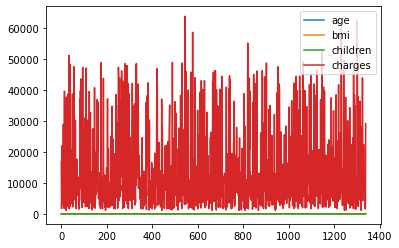

In [10]:
df.plot()

In [11]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()
df5=df.copy()
df6=df.copy()
df7=df.copy()
df8=df.copy()
df9=df.copy()
df10=df.copy()
df11=df.copy()

# Encoding

1. Without Use Any Encoding Techniques
2. Label Encoding
3. One-Hot Encoding
4. Ordinal Encoding

## Label Encoding

In [12]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df1.sex=le.fit_transform(df1.sex)

In [16]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [17]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
#using for loop
for col in df1.columns:
    if df1[col].dtype==np.number:
        continue
    else:
        df1[col]=le.fit_transform(df1[col])

In [19]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


## One hot encoding

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df2.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [23]:
dummy=pd.get_dummies(df2.region)

In [24]:
dummy.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [25]:
df2=df2.drop('region',axis=1)

In [26]:
df2.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [27]:
dummy=pd.get_dummies(df3.region,drop_first=True)
dummy.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [28]:
new_df=pd.concat([df2,dummy],axis=1)
new_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,1
1,18,male,33.770,1,no,1725.55230,0,1,0
2,28,male,33.000,3,no,4449.46200,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,0


In [29]:
df3.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
#loop
for col in df3.columns:
    if is_numeric_dtype(df3[col]):
        continue
    else:
        one = pd.get_dummies(df3[col],drop_first=True)
        df3.drop(df3[[col]],axis=1,inplace=True)
        df3=pd.concat([df3,one],axis=1)

df3.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Ordinal Encoder

In [31]:
df4.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
df4.smoker.unique()

array(['yes', 'no'], dtype=object)

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
smoke=['yes', 'no']

In [35]:
ordinal=OrdinalEncoder(categories=[smoke])
ordinal_value=ordinal.fit_transform(df5[['smoker']])

In [36]:
ordinal_value

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

In [37]:
new_smoke=pd.DataFrame(ordinal_value,columns=['smoker'])
new_smoke.head()

,smoker
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [38]:
df4.smoker=new_smoke
df4.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,0.0,southwest,16884.92400
1,18,male,33.770,1,1.0,southeast,1725.55230
2,28,male,33.000,3,1.0,southeast,4449.46200
3,33,male,22.705,0,1.0,northwest,21984.47061
4,32,male,28.880,0,1.0,northwest,3866.85520


In [39]:
#using loop
#using loop
cols=['sex','smoker','region']
for col in cols:
    if is_numeric_dtype(col):
        continue
    unique=df5[col].unique()
    df5[col]=OrdinalEncoder(categories=[unique]).fit_transform(df5[[col]])

In [40]:
df5.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,0.0,0.0,16884.92400
1,18,1.0,33.770,1,1.0,1.0,1725.55230
2,28,1.0,33.000,3,1.0,1.0,4449.46200
3,33,1.0,22.705,0,1.0,2.0,21984.47061
4,32,1.0,28.880,0,1.0,2.0,3866.85520


## Without use any encoding

In [41]:
df6.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
df6.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [43]:
df6.region=df6.region.replace(['southwest', 'southeast', 'northwest', 'northeast'],[1,2,3,4])

In [44]:
df6.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,1,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,3,21984.47061
4,32,male,28.880,0,no,3,3866.85520
